# Лабораторная работа №2
## Методы оценки статических характеристик, связанных с распределением пользователей на плоскости
### Выполнил Лобов Михаил НПМмд-02

In [38]:
#jupyter nbconvert --to markdown Project.ipynb

## Импортируем библиотеки 

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Задание №1

## Создаем выборки Экспоненциального распределения и Нормального распределения

In [40]:
exp_sample_100 = np.random.exponential(scale=1, size=100)
exp_sample_1000 = np.random.exponential(scale=1, size=1000)



norm_sample_100 = np.random.normal(loc=0, scale=1, size=100)
norm_sample_1000 = np.random.normal(loc=0, scale=1, size=1000)

## Мат ожидание и дисперсия
1. Мы считаем мат ожидание и дисперсию для созданных распределений
2. Задаем теоретическое мат ожидание и дисперсию для теоретических значений у данных распределений
   1. Мат ожидание и дисперсия у экспоненциальног распределения будет 1 и 1 соответсвенно, потому что мы такие задали при генерации 
   2. На практике случайные значнеия будут отличаться от теоретических, т.к. мы рассматриваем их на несовершенной выборке

### Все статистические вычисления выполняются с помощью встроенных функций numpy

In [41]:
def calculate_mean_variance(sample, distribution_name):
    sample_mean = np.mean(sample)
    sample_variance = np.var(sample, ddof=1)  

    if distribution_name == "exponential":
        theoretical_mean = 1  
        theoretical_variance = 1  
    elif distribution_name == "normal":
        theoretical_mean = 0  
        theoretical_variance = 1  

   
    print(f"Математическое ожидание ({distribution_name}): {theoretical_mean}")
    print(f"Наблюдаемое среднее ({distribution_name}, n={len(sample)}): {sample_mean:.4f}")
    print(f"Теоретическая дисперсия ({distribution_name}): {theoretical_variance}")
    print(f"Наблюдаемая дисперсия ({distribution_name}, n={len(sample)}): {sample_variance:.4f}")
    print("")


## Вызываем функцию вычисляющее среднее для каждого заданного распределения

In [42]:
calculate_mean_variance(exp_sample_100, "exponential")
calculate_mean_variance(exp_sample_1000, "exponential")
calculate_mean_variance(norm_sample_100, "normal")
calculate_mean_variance(norm_sample_1000, "normal")

Математическое ожидание (exponential): 1
Наблюдаемое среднее (exponential, n=100): 0.9101
Теоретическая дисперсия (exponential): 1
Наблюдаемая дисперсия (exponential, n=100): 0.5744

Математическое ожидание (exponential): 1
Наблюдаемое среднее (exponential, n=1000): 0.9969
Теоретическая дисперсия (exponential): 1
Наблюдаемая дисперсия (exponential, n=1000): 0.9619

Математическое ожидание (normal): 0
Наблюдаемое среднее (normal, n=100): -0.0815
Теоретическая дисперсия (normal): 1
Наблюдаемая дисперсия (normal, n=100): 1.2893

Математическое ожидание (normal): 0
Наблюдаемое среднее (normal, n=1000): 0.0251
Теоретическая дисперсия (normal): 1
Наблюдаемая дисперсия (normal, n=1000): 0.9782



## Тоже самое для квантилей

In [43]:
def calculate_quantiles(sample, distribution_name):
    sample_quantiles = np.quantile(sample, [0.5, 0.99])

    if distribution_name == "exponential":
        theoretical_quantiles = stats.expon.ppf([0.5, 0.99], scale=1)
    elif distribution_name == "normal":
        theoretical_quantiles = stats.norm.ppf([0.5, 0.99], loc=0, scale=1)

    print(f"Наблюдаемые квантили ({distribution_name}, n={len(sample)}): {sample_quantiles}")
    print(f"Теоретические квантили ({distribution_name}): {theoretical_quantiles}")
    print("\n")


In [44]:
calculate_quantiles(exp_sample_100, "exponential")
calculate_quantiles(exp_sample_1000, "exponential")
calculate_quantiles(norm_sample_100, "normal")
calculate_quantiles(norm_sample_1000, "normal")

Наблюдаемые квантили (exponential, n=100): [0.79599225 3.10469233]
Теоретические квантили (exponential): [0.69314718 4.60517019]


Наблюдаемые квантили (exponential, n=1000): [0.69396014 4.1181586 ]
Теоретические квантили (exponential): [0.69314718 4.60517019]


Наблюдаемые квантили (normal, n=100): [-0.11287732  2.37344646]
Теоретические квантили (normal): [0.         2.32634787]


Наблюдаемые квантили (normal, n=1000): [-1.7143188e-03  2.2685730e+00]
Теоретические квантили (normal): [0.         2.32634787]




## Построение графиков
Код для построения графиков взят с [Сайта](https://notebook.community/jaropolk2/python_statistics/stochastic_variables)!

In [45]:
def plot_histogram(sample, distribution_name, n):
    plt.figure(figsize=(8,6))
    plt.hist(sample, bins=30, density=True, alpha=0.6, color="skyblue", label="Гистограмма выборки")

    x = np.linspace(min(sample), max(sample), 1000)
    if distribution_name == "exponential":
        pdf = stats.expon.pdf(x, scale=1)
    elif distribution_name == "normal":
        pdf = stats.norm.pdf(x, loc=0, scale=1)
    plt.plot(x, pdf, "r", label="Теоретическая плотность")

    plt.title(f"Гистограмма {distribution_name} распределения (n={n})")
    plt.xlabel("Значение")
    plt.ylabel("Плотность")
    plt.legend()
    plt.grid(True)
    plt.show()


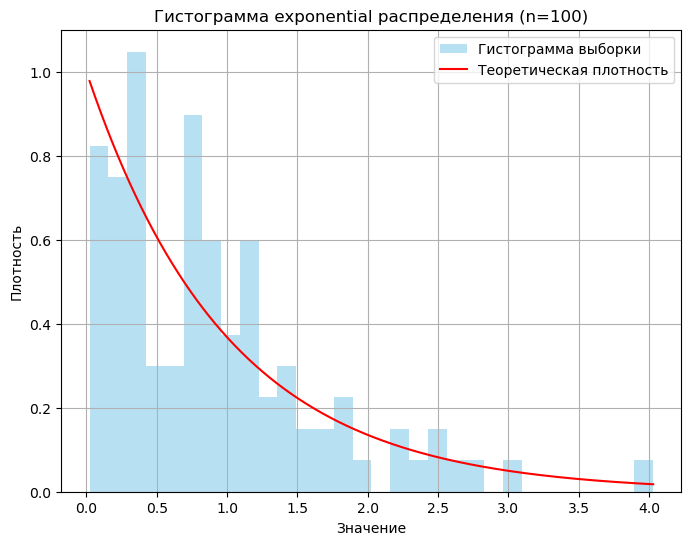

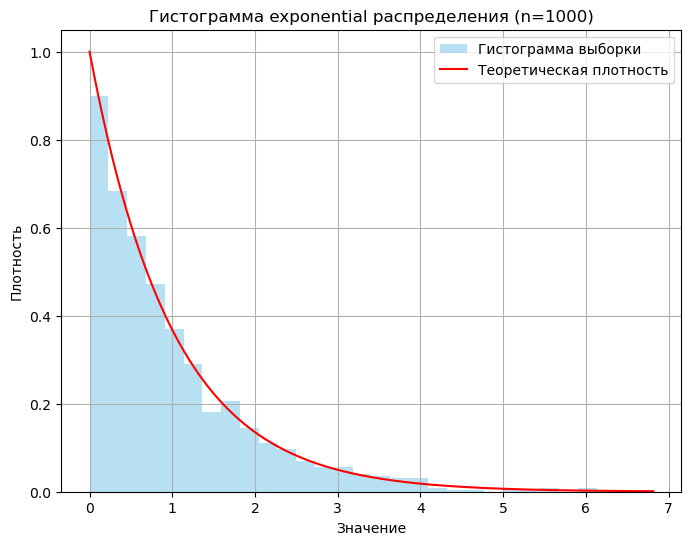

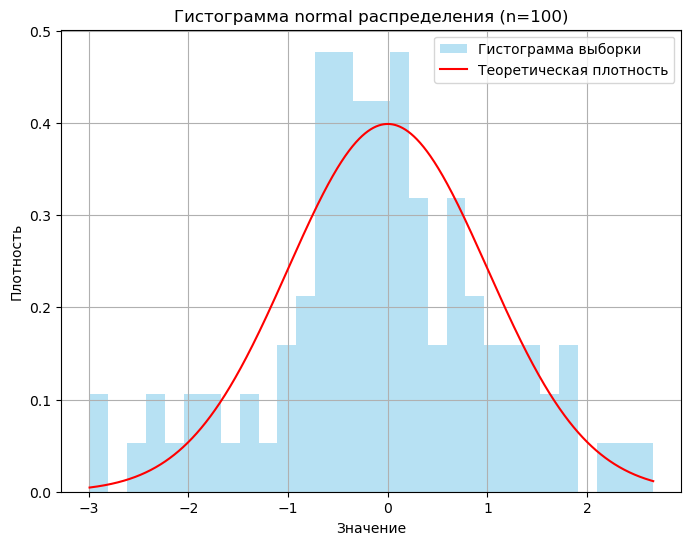

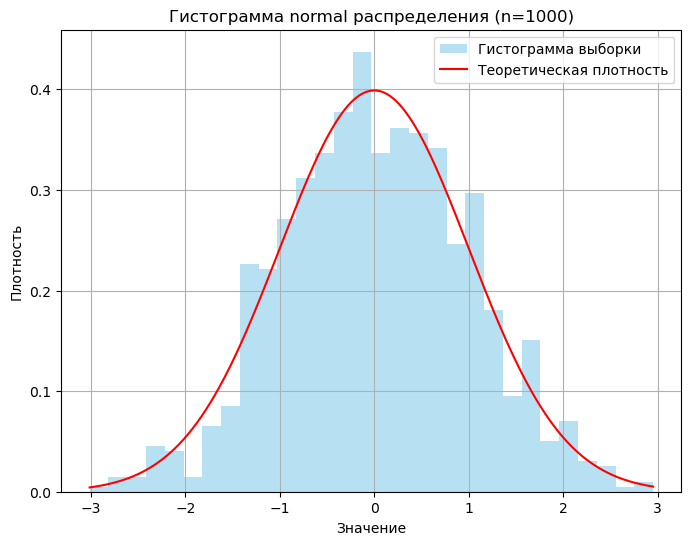

In [46]:
plot_histogram(exp_sample_100, "exponential", 100)
plot_histogram(exp_sample_1000, "exponential", 1000)
plot_histogram(norm_sample_100, "normal", 100)
plot_histogram(norm_sample_1000, "normal", 1000)

## Функция распределения случайной величины на основе выборки в сравнении с теоретической 

In [47]:
def plot_cdf(sample_100, sample_1000, distribution_name):
    sorted_sample_100 = np.sort(sample_100)
    sorted_sample_1000 = np.sort(sample_1000)

    ecdf_100 = np.arange(1, len(sorted_sample_100)+1) / len(sorted_sample_100)
    ecdf_1000 = np.arange(1, len(sorted_sample_1000)+1) / len(sorted_sample_1000)

    plt.figure(figsize=(8,6))
    plt.step(sorted_sample_100, ecdf_100, where="post", label="Эмпирическая функция (n=100)")
    plt.step(sorted_sample_1000, ecdf_1000, where="post", label="Эмпирическая функция (n=1000)")

    x = np.linspace(min(np.min(sorted_sample_100), np.min(sorted_sample_1000)),
                    max(np.max(sorted_sample_100), np.max(sorted_sample_1000)), 1000)
    if distribution_name == "exponential":
        cdf = stats.expon.cdf(x, scale=1)
    elif distribution_name == "normal":
        cdf = stats.norm.cdf(x, loc=0, scale=1)
    plt.plot(x, cdf, "r", label="Теоретическая функция распределения")

    plt.title(f"Функция распределения ({distribution_name})")
    plt.xlabel("Значение")
    plt.ylabel("F(x)")
    plt.legend()
    plt.grid(True)
    plt.show()


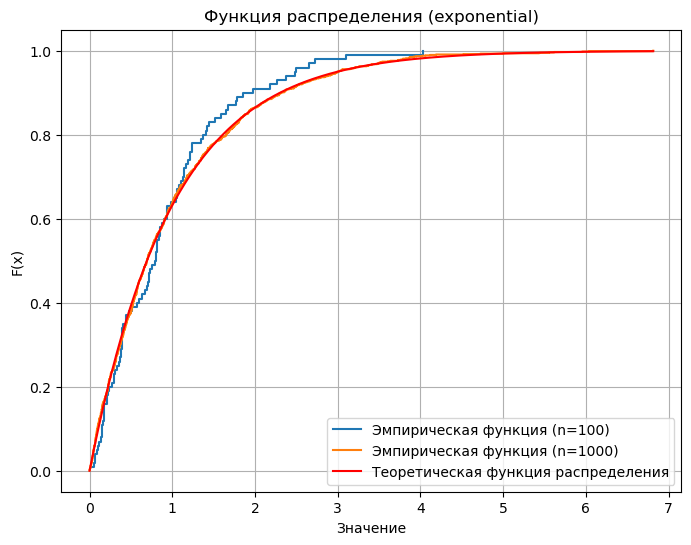

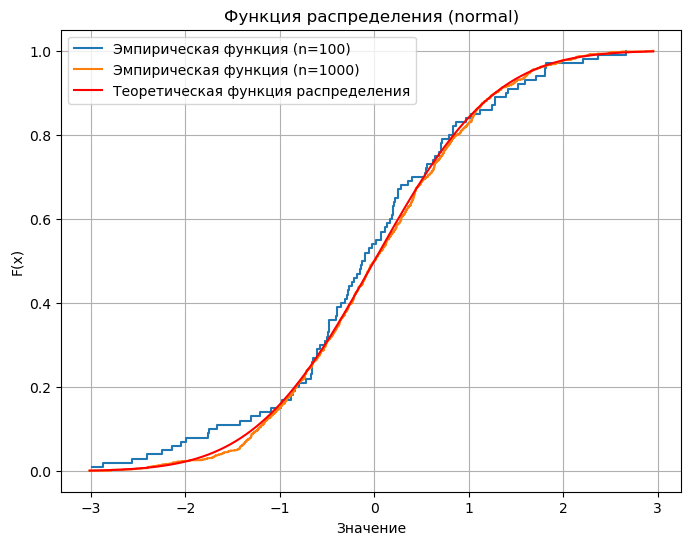

In [48]:
plot_cdf(exp_sample_100, exp_sample_1000, "exponential")
plot_cdf(norm_sample_100, norm_sample_1000, "normal")

## Плотность распределения случайной величины на основе выборки по сравнению с $$\textcolor{red}{Теоретическим значением}$$

In [49]:
def plot_density(sample_100, sample_1000, distribution_name):
    from scipy.stats import gaussian_kde

    density_100 = gaussian_kde(sample_100)
    density_1000 = gaussian_kde(sample_1000)

    x = np.linspace(min(np.min(sample_100), np.min(sample_1000)),
                    max(np.max(sample_100), np.max(sample_1000)), 1000)

    plt.figure(figsize=(8,6))
    plt.plot(x, density_100(x), label="Оценка плотности при n=100")
    plt.plot(x, density_1000(x), label="Оценка плотности  при n=1000")

    if distribution_name == "exponential":
        pdf = stats.expon.pdf(x, scale=1)
    elif distribution_name == "normal":
        pdf = stats.norm.pdf(x, loc=0, scale=1)
    plt.plot(x, pdf, 'r', label="Теоретическая плотность")

    plt.title(f"Плотность распределения ({distribution_name})")
    plt.xlabel("Значение")
    plt.ylabel("Плотность")
    plt.legend()
    plt.grid(True)
    plt.show()


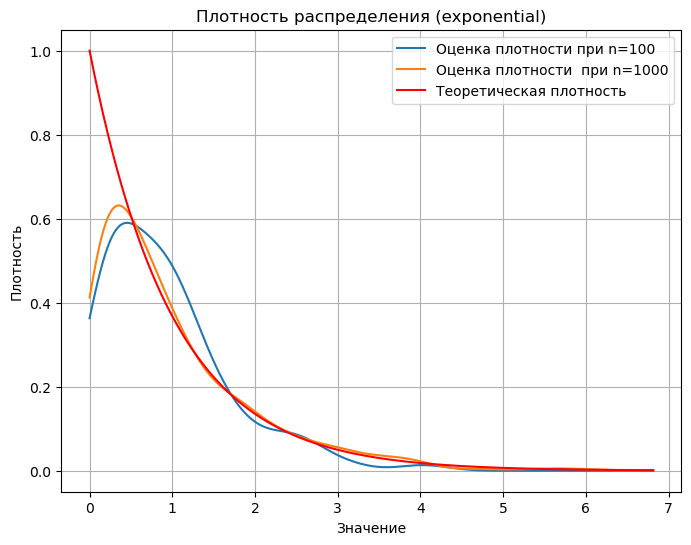

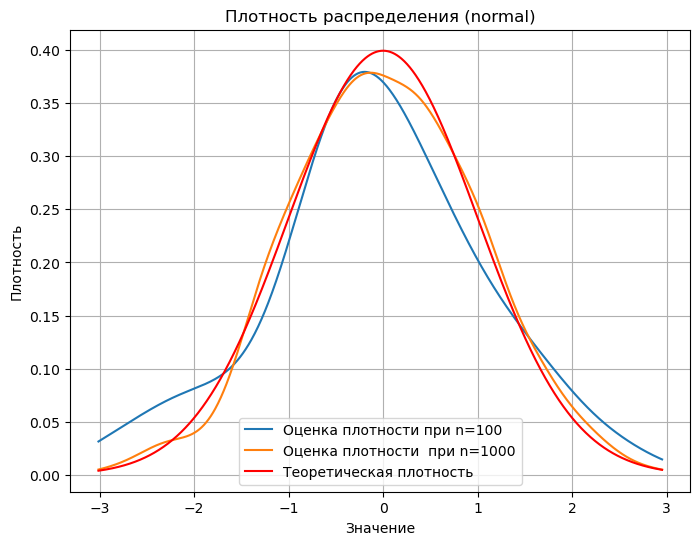

In [50]:
plot_density(exp_sample_100, exp_sample_1000, "exponential")
plot_density(norm_sample_100, norm_sample_1000, "normal")

# Задание №2

  *Сгенерировать три выборки размера 100, 1000 и 10000 для случайных расстояний между двумя точками, равномерно распределенные в прямоугольнике со сторонами 10 и 30. Получить среднее значение расстояния между точками, построить функцию распределения вероятностей и плотности вероятностей случайных расстояний. Показать разницу между соответствующими функциями на одном графике.*


## Создание 2 случайных точек и вычисление расстояни между ними

In [51]:
def generate_points(sample_size, width=10, height=30):
    x1 = np.random.uniform(0, width, sample_size)
    y1 = np.random.uniform(0, height, sample_size)
    x2 = np.random.uniform(0, width, sample_size)
    y2 = np.random.uniform(0, height, sample_size)
    distances = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return distances

## Задаем 3  расстояния из задания и в каждом случае создаем точки, между котороми будем считать расстояние

In [52]:
sizes = [100, 1000, 10000]
distance_samples = {}

for size in sizes:
    distances = generate_points(size, width=10, height=30)
    distance_samples[size] = distances

In [55]:
from scipy.stats import gaussian_kde
def plot_cdf(samples_dict):
    plt.figure(figsize=(10,6))
    for size, distances in samples_dict.items():
        sorted_distances = np.sort(distances)
        ecdf = np.arange(1, len(sorted_distances)+1) / len(sorted_distances)
        plt.step(sorted_distances, ecdf, where="post", label=f"n={size}")
    
    plt.title("Эмпирическая функция распределения расстояний")
    plt.xlabel("Расстояние")
    plt.ylabel("F(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_pdf(samples_dict):
    plt.figure(figsize=(10,6))
    x_min = min([min(distances) for distances in samples_dict.values()])
    x_max = max([max(distances) for distances in samples_dict.values()])
    x = np.linspace(x_min, x_max, 1000)
    
    for size, distances in samples_dict.items():
        density = gaussian_kde(distances)
        plt.plot(x, density(x), label=f'n={size}')
    
    plt.title("Плотность распределения расстояний")
    plt.xlabel("Расстояние")
    plt.ylabel("Плотность")
    plt.legend()
    plt.grid(True)
    plt.show()

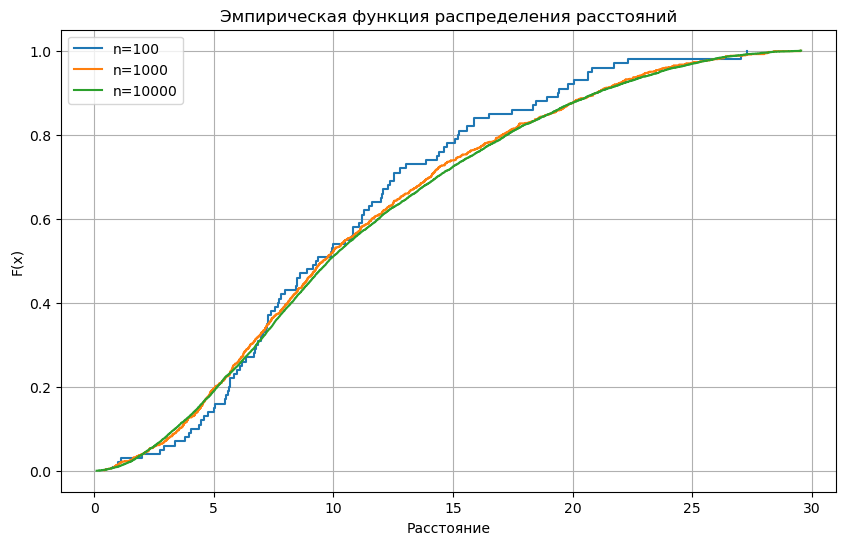

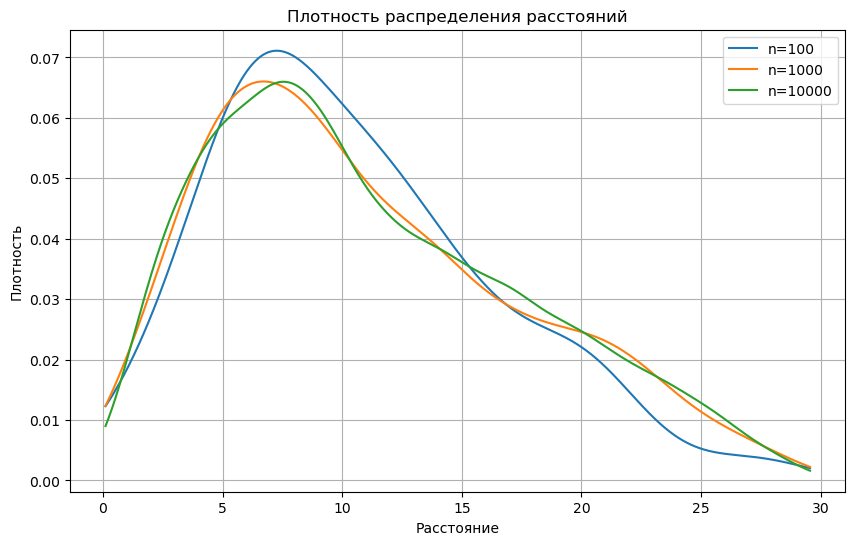

In [56]:
plot_cdf(distance_samples)
plot_pdf(distance_samples)